# Homework 06 - Convolutional Neural Networks

In this homework you will implement a convolutional neural network to solve a object recognition task. The dataset you will work with is the CIFAR10 dataset, which contains small RGB images for ten different classes. 
 
To learn how you implement neural networks on your own I will only give minimal supervision, but you can get a lot of help from the last homework.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

### Investigate the dataset.

Q: *How many training/test images does this dataset have?*  
A: 50000 training images, 10000 test images

Q: *Which shape does one image have?*  
A: 32 times 32 pixels

Q: *In which range are the pixel values?*  
A: 0 to 255


In [4]:
### YOUR CODE HERE ###
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(np.max(train_images))
print(np.min(train_images))
print(np.max(train_labels))
print(np.min(train_labels))
print(type(train_images[0][0][0][0]))
#######################

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
255
0
9
0
<class 'numpy.uint8'>


#### Have a look at some images from the dataset.

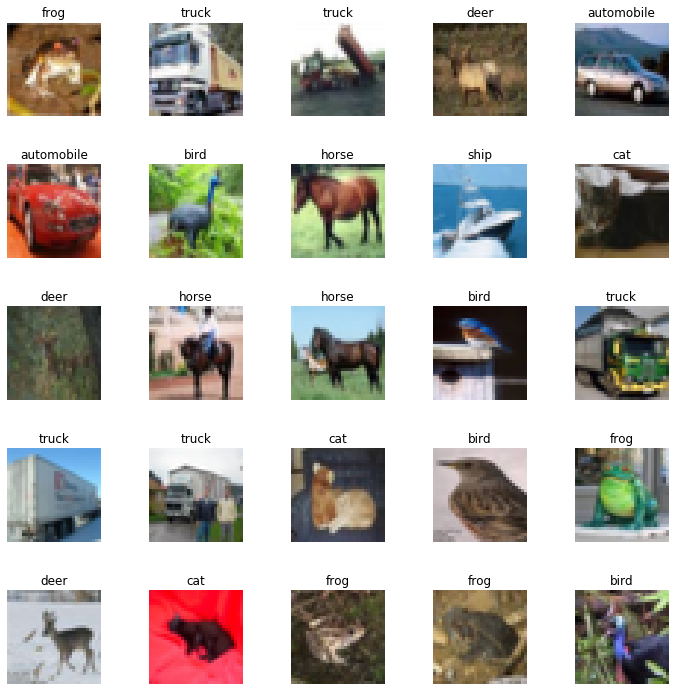

In [5]:
label_words = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, ax = plt.subplots(5,5,figsize=(10,10))
fig.tight_layout()
ax = ax.flatten()
for i in range(25):
    ### YOUR CODE HERE ###
    # Readout an image and the corresponding label.
    img = train_images[i]
    lbl = label_words[train_labels[i][0]]
    ######################
    ax[i].imshow(img)
    ax[i].set_title(lbl)
    ax[i].axis("off")

### Prepare the TensorFlow dataset.

In [6]:
train_images = np.array(train_images, dtype=np.float32)
test_images = np.array(test_images, dtype=np.float32)
train_images, test_images = train_images / 255.0, test_images / 255.0
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Shuffle the training dataset.
# Use a batchsize of 32 for the training dataset.
# Use full batch for the test dataset/
#### YOUR CODE HERE ###
train_dataset = train_dataset.shuffle(buffer_size=50000)
train_dataset = train_dataset.batch(32)
test_dataset = test_dataset.batch(10000)
#######################

### Build the model.

In [7]:
from tensorflow.keras.layers import Layer

# You will implement a CNN. The layers you need are: tf.keras.layers.Conv2D, tf.keras.layers.MaxPool2D, 
# tf.keras.layers.Flatten, tf.keras.layers.Dense

# Input
# Convolutional layer: 32 kernels of size (3,3) with ReLU activation function (tf.keras.activations.relu)
# Note: In the first layer you have to provide the input shape to the function (argument: input_shape).
# Maxpooling layer: pooling size (2,2) and strides (2,2).
# Convolutional layer: 64 kernels of size (3,3) with ReLU activation function 
# Maxpooling layer: pooling size (2,2) and strides (2,2).
# Convolutional layer: 64 kernels of size (3,3) with ReLU activation function
# Flatten the resulting ferature maps.
# Fully connected layer with 64 hidden neurons and ReLU activation function.
# Fully connected layer with 10 output neurons and softmax activation function (tf.keras.activations.softmax).

class Model(Layer):
    
    def __init__(self):
        super(Model, self).__init__()
        ### YOUR CODE HERE ###
        # Initialize all layers.
        self.conv_layer_1 = tf.keras.layers.Conv2D(
                                filters=32,
                                kernel_size=3,
                                activation=tf.keras.activations.relu,
                                input_shape=(32,32,3)
                            )
        self.max_pool_1 = tf.keras.layers.MaxPool2D()
        self.conv_layer_2 = tf.keras.layers.Conv2D(
                                filters=64,
                                kernel_size=3,
                                activation=tf.keras.activations.relu
                            )
        self.max_pool_2 = tf.keras.layers.MaxPool2D()
        self.conv_layer_3 = tf.keras.layers.Conv2D(
                                filters=64,
                                kernel_size=3,
                                activation=tf.keras.activations.relu
                            )
        self.flatten = tf.keras.layers.Flatten()
        self.fully_connected_1 = tf.keras.layers.Dense(
                                units=64,
                                activation=tf.keras.activations.relu
                            )
        self.fully_connected_2 = tf.keras.layers.Dense(
                                units=10,
                                activation=tf.keras.activations.softmax
                            )
        ########################
        
    def call(self, x):
        ### YOUR CODE HERE ###
        # Define the model.
        x = self.conv_layer_1(x)
        x = self.max_pool_1(x)
        x = self.conv_layer_2(x)
        x = self.max_pool_2(x)
        x = self.conv_layer_3(x)
        x = self.flatten(x)
        x = self.fully_connected_1(x)
        x = self.fully_connected_2(x)
        return x
        ######################

### Train the model.

In [8]:
tf.keras.backend.clear_session()

### YOUR CODE HERE ###
# Initialize model, loss (categorical cross entropy) and optimizer (Adam).
model = Model()
cross_entropy_loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
######################

# Initialize lists for later visualiztion
train_steps = []
train_losses = []
train_accuracies = []
test_steps = []
test_losses = []
test_accuracies = []
step = 0


for epoch in range(3):
    
    for (x,t) in train_dataset:
        
        t = tf.reshape(t, shape=[-1])
        
        ### YOUR CODE HERE ###
        # Turn the labels into one-hot vectors.
        t = tf.one_hot(t, depth=10)
        
        # Perform a training step.
        with tf.GradientTape() as tape:
            output = model(x)
            loss = cross_entropy_loss(t, output)
            gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))  
        
        # Calculate the training accuracy every 25 steps.
        if step % 25 == 0:
            accuracy = np.sum(np.argmax(t, axis=1) == np.argmax(output, axis=1)) / t.shape[0]
            train_accuracies.append(accuracy)
            train_losses.append(loss)
            train_steps.append(step)
        
        # Calculate the test loss and accuracy every 50 steps.
        if step % 50 == 0:
            for (x,t) in test_dataset:
                t = tf.reshape(t, shape=[-1])
                t = tf.one_hot(t, depth=10)
                output = model(x)
                loss = cross_entropy_loss(t, output)
                accuracy = np.sum(np.argmax(t, axis=1) == np.argmax(output, axis=1)) / t.shape[0]
                test_steps.append(step)
                test_accuracies.append(accuracy)
                test_losses.append(loss)
        ########################
        
        step += 1

### Visualize the training progress.

Your model should achieve around 60-70% test accuracy.

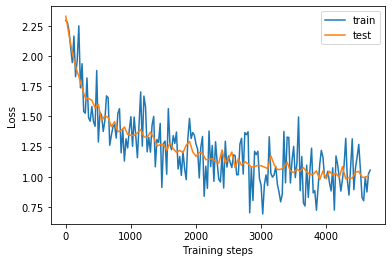

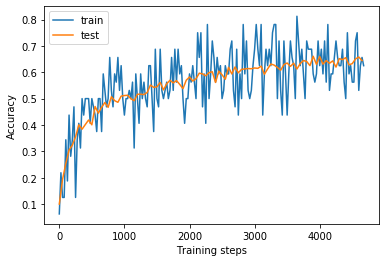

In [12]:
### YOUR CODE HERE ###
plt.figure()
line1, = plt.plot(train_steps, train_losses)
line2, = plt.plot(test_steps, test_losses)
plt.legend((line1,line2),("train", "test"))
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.show()

plt.figure()
line1, = plt.plot(train_steps, train_accuracies)
line2, = plt.plot(test_steps, test_accuracies)
plt.legend((line1,line2),("train", "test"))
plt.xlabel("Training steps")
plt.ylabel("Accuracy")
plt.show()
######################